Confusion Matrix:
[[175  37]
 [ 13 344]]
Accuracy   : 0.9121
Precision  : 0.9029
Recall     : 0.9636
F1 Score   : 0.9322


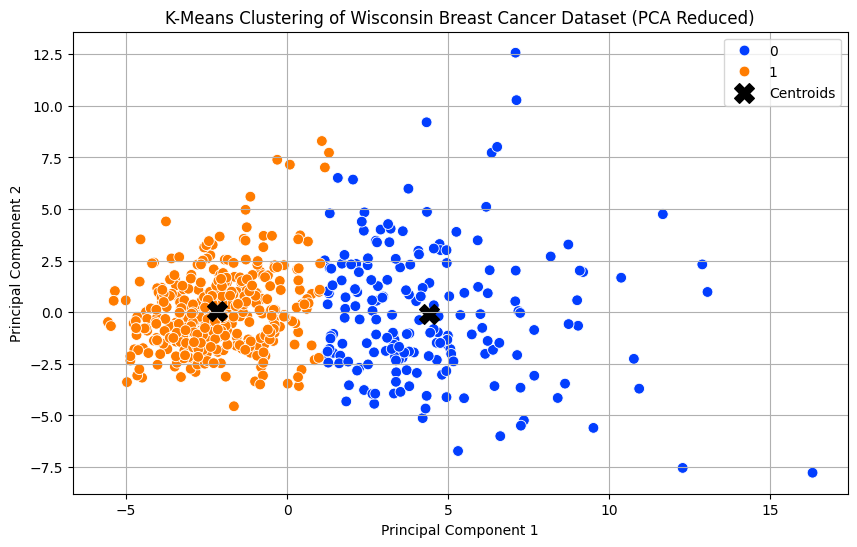

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

labels_corrected = labels
if accuracy_score(y, labels) < 0.5:
    labels_corrected = 1 - labels

cm = confusion_matrix(y, labels_corrected)
acc = accuracy_score(y, labels_corrected)
precision = precision_score(y, labels_corrected)
recall = recall_score(y, labels_corrected)
f1 = f1_score(y, labels_corrected)

print("Confusion Matrix:")
print(cm)
print(f"Accuracy   : {acc:.4f}")
print(f"Precision  : {precision:.4f}")
print(f"Recall     : {recall:.4f}")
print(f"F1 Score   : {f1:.4f}")

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
palette = sns.color_palette("bright", 2)

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_corrected, palette=palette, s=60)
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='black', marker='X', label='Centroids')

plt.title('K-Means Clustering of Wisconsin Breast Cancer Dataset (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()
